In [33]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def extract_number(num: str) -> float:
    new_num = ''
    for sym in num:
        if sym.isdigit() or sym == '.':
            new_num += sym
    return float(new_num)

In [4]:
path = r".\выписки"

combined_data = pd.DataFrame(columns=['Дата операции', 'Сумма', 'Описание', 'Номер карты', 'Категория'])
for fl in os.listdir(path):
    if '.xlsx' in fl:
        df = pd.read_excel(path + '\\' + fl, names=['Дата операции', 'Сумма', 'Описание', 'Номер карты', 'Категория'], engine='openpyxl')
        combined_data = pd.concat([combined_data, df])

C:\Users\polle\AppData\Local\Temp\ipykernel_12784\2541246451.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_data = pd.concat([combined_data, df])


In [49]:
combined_data

,Дата операции,Сумма,Описание,Номер карты,Категория,Поступление,Расход
0,2024-12-26 21:57:00,-450.00 ₽,Оплата в IP Gobechiya E.S. Moskva RUS,908,NaN,0.00,450.00
1,2024-12-26 20:10:00,-900.00 ₽,Внешний перевод по номеру телефона 79160661824,6877,NaN,0.00,900.00
2,2024-12-26 16:22:00,-245.00 ₽,Оплата в STOLOVAYA EK.FAK. MOSCOW RUS,908,NaN,0.00,245.00
3,2024-12-25 21:52:00,-2 912.65 ₽,Перевод. Подарок по акции на брокерский счёт,6877,NaN,0.00,2912.65
4,2024-12-25 21:52:00,+2 912.65 ₽,Пополнение. Подарок по акции на брокерский счёт,6877,NaN,2912.65,0.00
...,...,...,...,...,...,...,...
672,2024-01-05 18:25:00,-458.00 ₽,Оплата в wildberries Podol'sk RUS,4912,NaN,0.00,458.00
673,2024-01-05 18:16:00,-388.00 ₽,Внешний перевод по номеру телефона\n+79294189436,4912,NaN,0.00,388.00
674,2024-01-05 08:05:00,+5 000.00 ₽,Пополнение. Система быстрых платежей,4912,NaN,5000.00,0.00
675,2024-01-04 06:51:00,-199.00 ₽,Оплата услуг Tinkoff.tinkoff- bundle,4912,NaN,0.00,199.00


In [6]:
combined_data['Поступление'] = combined_data['Сумма'].apply(lambda val: extract_number(str(val)) if str(val).find('+') != -1 else 0)

In [7]:
combined_data['Расход'] = combined_data['Сумма'].apply(lambda val: extract_number(str(val)) if str(val).find('-') != -1 else 0)

### Общая таблица данных

In [8]:
combined_data.drop('Сумма', axis=1)

,Дата операции,Описание,Номер карты,Категория,Поступление,Расход
0,2024-12-26 21:57:00,Оплата в IP Gobechiya E.S. Moskva RUS,908,NaN,0.00,450.00
1,2024-12-26 20:10:00,Внешний перевод по номеру телефона 79160661824,6877,NaN,0.00,900.00
2,2024-12-26 16:22:00,Оплата в STOLOVAYA EK.FAK. MOSCOW RUS,908,NaN,0.00,245.00
3,2024-12-25 21:52:00,Перевод. Подарок по акции на брокерский счёт,6877,NaN,0.00,2912.65
4,2024-12-25 21:52:00,Пополнение. Подарок по акции на брокерский счёт,6877,NaN,2912.65,0.00
...,...,...,...,...,...,...
672,2024-01-05 18:25:00,Оплата в wildberries Podol'sk RUS,4912,NaN,0.00,458.00
673,2024-01-05 18:16:00,Внешний перевод по номеру телефона\n+79294189436,4912,NaN,0.00,388.00
674,2024-01-05 08:05:00,Пополнение. Система быстрых платежей,4912,NaN,5000.00,0.00
675,2024-01-04 06:51:00,Оплата услуг Tinkoff.tinkoff- bundle,4912,NaN,0.00,199.00


### Средние поступления по месяцам (на человека)

In [20]:
incomes = combined_data.groupby([combined_data['Дата операции'].dt.month]).apply(lambda group: pd.Series({'Средний доход': group['Поступление'].sum()/3})).round(2).reset_index().rename(columns={'Дата операции':'Номер месяца'})
incomes_per_card = combined_data.groupby([combined_data['Дата операции'].dt.month]).apply(lambda group: pd.Series({'Средний доход': group['Поступление'].sum()/5})).round(2).reset_index().rename(columns={'Дата операции':'Номер месяца'})

In [21]:
incomes

,Номер месяца,Средний доход
0,1,13200.11
1,2,73985.62
2,3,299813.59
3,4,34796.08
4,5,57774.07
5,6,96878.01
6,7,75540.06
7,8,138581.30
8,9,98949.81
9,10,215475.79


### Средние расходы по месяцам (на человека)

In [19]:
expenses = combined_data.groupby([combined_data['Дата операции'].dt.month]).apply(lambda group: pd.Series({'Средний расход': group['Расход'].sum()/3})).round(2).reset_index().rename(columns={'Дата операции':'Номер месяца'})
expenses_per_card = combined_data.groupby([combined_data['Дата операции'].dt.month]).apply(lambda group: pd.Series({'Средний расход': group['Расход'].sum()/5})).round(2).reset_index().rename(columns={'Дата операции':'Номер месяца'})

In [22]:
expenses

,Номер месяца,Средний расход
0,1,60962.59
1,2,73840.87
2,3,312112.89
3,4,40485.39
4,5,56054.33
5,6,103136.23
6,7,83869.29
7,8,144453.53
8,9,105769.20
9,10,229426.03


### Группировка доходов по картам и месяцам

In [13]:
combined_data.groupby([combined_data['Дата операции'].dt.month, 'Номер карты']).apply(lambda group: pd.Series({'Доход': group['Поступление'].sum()})).round(2).reset_index().rename(columns={'Дата операции':'Номер месяца'})

C:\Users\polle\AppData\Local\Temp\ipykernel_12784\458120088.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  combined_data.groupby([combined_data['Дата операции'].dt.month, 'Номер карты']).apply(lambda group: pd.Series({'Доход': group['Поступление'].sum()})).round(2).reset_index().rename(columns={'Дата операции':'Номер месяца'})


,Номер месяца,Номер карты,Доход
0,1,908,0.00
1,1,1372,0.00
2,1,4912,37855.00
3,1,6877,240.00
4,1,8988,0.00
...,...,...,...
62,12,908,0.00
63,12,4912,101868.43
64,12,6877,37512.83
65,12,8988,0.00


### Группировка расходов по картам и месяцам

In [14]:
combined_data.groupby([combined_data['Дата операции'].dt.month, 'Номер карты']).apply(lambda group: pd.Series({'Расход': group['Расход'].sum()})).round(2).reset_index().rename(columns={'Дата операции':'Номер месяца'})

C:\Users\polle\AppData\Local\Temp\ipykernel_12784\1462038827.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  combined_data.groupby([combined_data['Дата операции'].dt.month, 'Номер карты']).apply(lambda group: pd.Series({'Расход': group['Расход'].sum()})).round(2).reset_index().rename(columns={'Дата операции':'Номер месяца'})


,Номер месяца,Номер карты,Расход
0,1,908,5885.84
1,1,1372,16000.00
2,1,4912,42666.42
3,1,6877,5853.00
4,1,8988,112482.52
...,...,...,...
62,12,908,10292.00
63,12,4912,101868.43
64,12,6877,28207.03
65,12,8988,65541.70


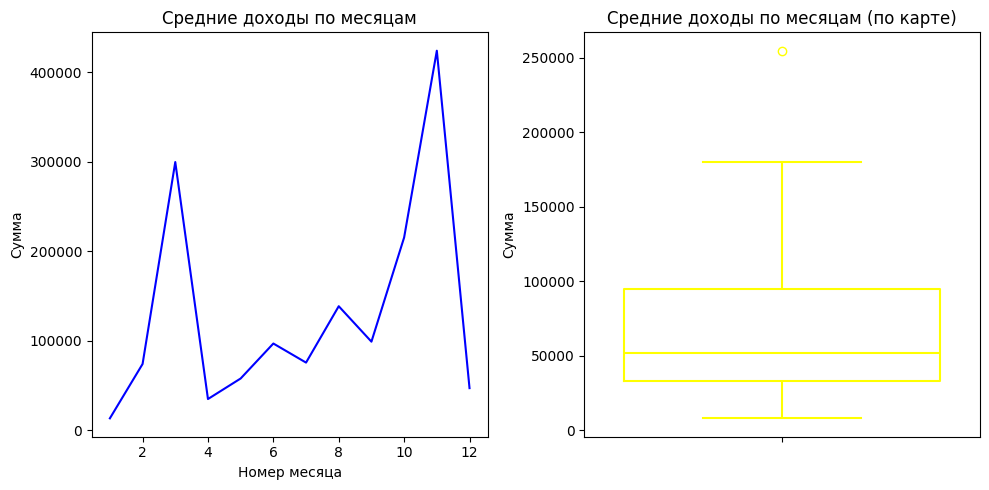

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.lineplot(x=incomes['Номер месяца'], y=incomes['Средний доход'], color='blue', ax=ax[0])
ax[0].set_title('Средние доходы по месяцам')
ax[0].set_xlabel('Номер месяца')
ax[0].set_ylabel('Сумма')

sns.boxplot(incomes_per_card['Средний доход'], ax=ax[1], fill=False, color='yellow')
ax[1].set_title('Средние доходы по месяцам (по карте)')
ax[1].set_ylabel('Сумма')

plt.tight_layout()
plt.show()

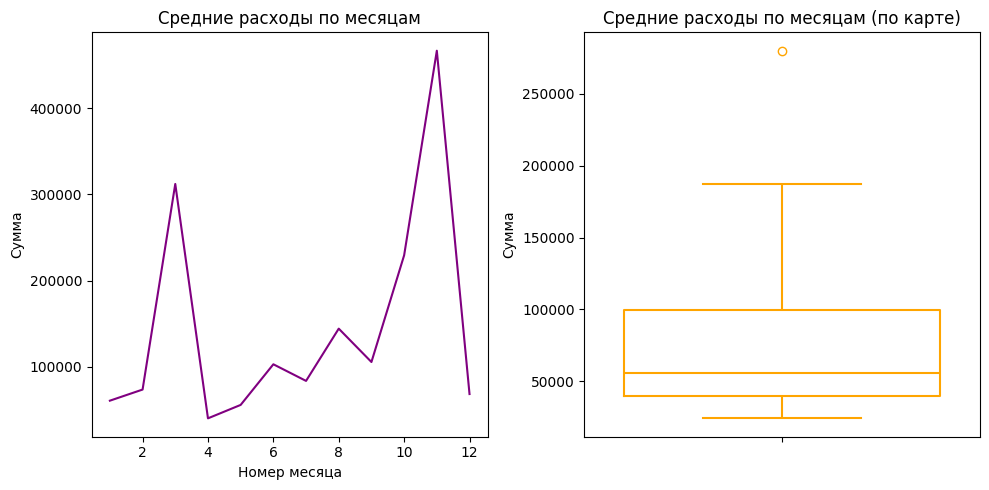

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.lineplot(x=expenses['Номер месяца'], y=expenses['Средний расход'], color='purple', ax=ax[0])
ax[0].set_title('Средние расходы по месяцам')
ax[0].set_xlabel('Номер месяца')
ax[0].set_ylabel('Сумма')

sns.boxplot(expenses_per_card['Средний расход'], ax=ax[1], fill=False, color='orange')
ax[1].set_title('Средние расходы по месяцам (по карте)')
ax[1].set_ylabel('Сумма')

plt.tight_layout()
plt.show()

Заметки:
1. Боксплоты представлены по средним доходам/расходам по карте
2. Значения, полученные при расчете средних доходов/расходов на человека, превышают ожидания за счет частых манипуляций с вкладами (открытие/закрытие/перевод) - практически ежемесячно. Можно заметить некоторую тенденцию, что операции с большими суммами происходят каждые три месяца. Возможно, что вклады использовались сроком на 3 месяца.
3. Март, август, октябрь, ноябрь - самые доходные и затратные месяцы
4. Самые распространенные операции - внутренние переводы и переводы СБП